In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_rows = 300
import datetime as dt
import math
import seaborn as sns
import miceforest as mf
from tableone import TableOne, load_dataset

# 根据定义筛选S-AKI患者

## sepsis

In [2]:
data_dir = "/public/hanl/jupyter_dir/kidney_sepsis_penotype_v2/00.data_aumc/disease_definition/sepsis/"
infile = data_dir + "aumc_sepsis_onset.csv"
df_sepsis = pd.read_csv(infile)
sepsis_lst = df_sepsis.stay_id.tolist()
print("sepsis患者数量为(by sepsis3)：",df_sepsis.shape[0])
df_sepsis.head(1)

sepsis患者数量为(by sepsis3)： 8565


/home/hanl/miniconda3/envs/mytensor/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,stay_id,sepsis_onset
0,2,0.0


## CKD

In [3]:
# data_dir = "/public/hanl/jupyter_dir/database/AMUCdb/disease_definition/sepsis_episode/ref_sepsis_definition/out/"
# infile = data_dir + "combined_diagnoses.csv"
# df_ckd = pd.read_csv(infile)
# df_ckd = df_ckd[[ 'admissionid',  'specialty', 'diagnosis_type', 'diagnosis', 'diagnosis_id', 'surgical',
#        'diagnosis_group', 'diagnosis_group_id', 'diagnosis_subgroup',
#        'diagnosis_subgroup_id']]

/home/hanl/miniconda3/envs/mytensor/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## AKI

In [4]:
data_dir = "/public/hanl/jupyter_dir/kidney_sepsis_penotype_v1/00.data_aumc/disease_definition/AKI/"
infile = data_dir + "aumc_first_and_max_stage.csv"
df_aki = pd.read_csv(infile)
df_aki_first = df_aki[["stay_id","first_aki_onset","first_aki_stage"]]
df_aki_first.columns = ["stay_id","aki_onset","aki_stage"]
aki_lst = df_aki_first.stay_id.unique().tolist()
print("aki患者数量为(by KDIGO)：",len(aki_lst))
df_aki_first.head(2)

/home/hanl/miniconda3/envs/mytensor/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


aki患者数量为(by KDIGO)： 15068


,stay_id,aki_onset,aki_stage
0,0,5,1.0
1,3,18,1.0


## sepsis without CKD;  sepsis with AKI

In [5]:
#sepsis_minus_ckd_lst = list(set(sepsis_lst).difference(ckd_lst))
#sepsis_minusCKD_addAKI_lst = list(set(sepsis_minus_ckd_lst).intersection(aki_lst))

#sepsis_noKidney_lst = list(set(sepsis_lst).difference(ckd_lst, aki_lst))
#print("sepsis_minusCKD_addAKI_lst:",len(sepsis_minusCKD_addAKI_lst)," sepsis_noKidney:",len(sepsis_noKidney_lst))
sepsis_addAKI_lst = list(set(sepsis_lst).intersection(aki_lst))
print(len(sepsis_addAKI_lst))

6350


/home/hanl/miniconda3/envs/mytensor/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# S-AKI 纳排标准

## 在sepsis后一周内发生AKI的病人

在sepsis后一周内发生AKI的病人数量： 4767


/home/hanl/miniconda3/envs/mytensor/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/hanl/miniconda3/envs/mytensor/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/hanl/miniconda3/envs/mytensor/lib/python3.9/site-packages/ipykernel/pylab/backend_inline.py:164: DeprecationWarning: `configure_inline_support` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.configure_inli

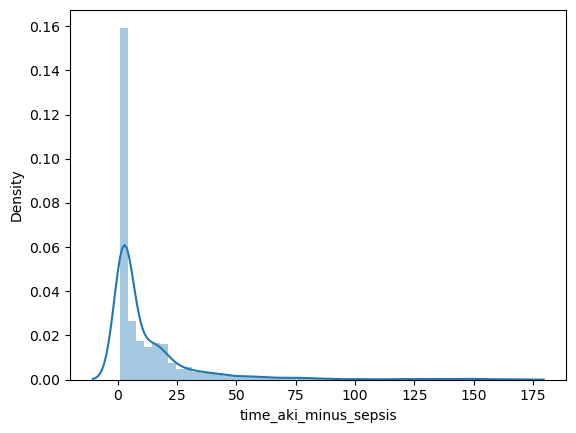

In [6]:
df_sepsis = df_sepsis[df_sepsis["stay_id"].isin(sepsis_addAKI_lst)]
df_aki_first = df_aki_first[df_aki_first["stay_id"].isin(sepsis_addAKI_lst)]

df_sepsis_aki = pd.merge(df_sepsis, df_aki_first, how="left", on = ["stay_id"])
df_sepsis_aki["time_aki_minus_sepsis"] =  (df_sepsis_aki["aki_onset"] - df_sepsis_aki["sepsis_onset"])
df_sepsis_aki = df_sepsis_aki[(df_sepsis_aki["time_aki_minus_sepsis"]>0) & (df_sepsis_aki["time_aki_minus_sepsis"]<=168)]
saki_lst = df_sepsis_aki.stay_id.unique().tolist()
print("在sepsis后一周内发生AKI的病人数量：",len(saki_lst))
sns.distplot(df_sepsis_aki["time_aki_minus_sepsis"])
plt.show()

/home/hanl/miniconda3/envs/mytensor/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/hanl/miniconda3/envs/mytensor/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


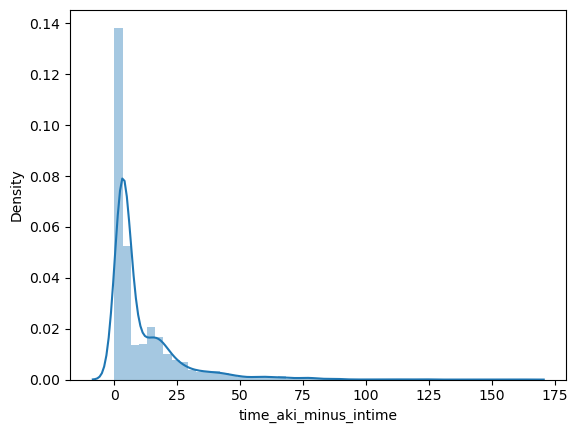

/home/hanl/miniconda3/envs/mytensor/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


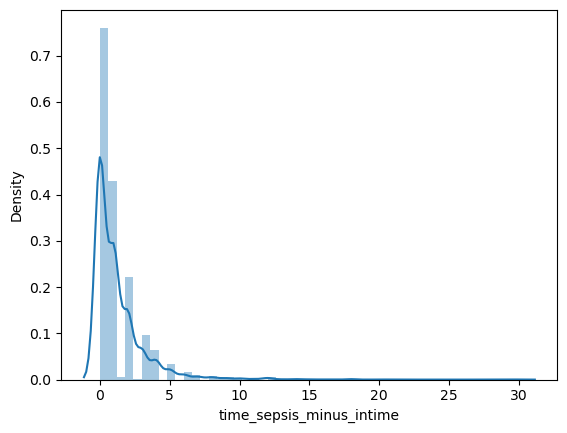

In [11]:
# df_time = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/00.data_aumc//disease_definition/AKI/aumcdb_sk_event_time.csv")
# df_time = df_time[df_time["stay_id"].isin(saki_lst)]

# df_time["time_aki_minus_intime"] =  (df_time["aki_onset"] - df_time["intime"]) 
# df_time["time_sepsis_minus_intime"] =  (df_time["sepsis_onset"] - df_time["intime"]) 
# sns.distplot(df_time[(df_time["time_aki_minus_intime"]<=168) & (df_time["time_aki_minus_intime"]>=0)]["time_aki_minus_intime"])
# plt.show()
# sns.distplot(df_time[(df_time["time_sepsis_minus_intime"]<=168) & (df_time["time_sepsis_minus_intime"]>=0)]["time_sepsis_minus_intime"])
# plt.show()

In [9]:
ss

/home/hanl/miniconda3/envs/mytensor/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


NameError: name 'ss' is not defined

## 除去age<18, los<1

In [ ]:
df_demo =  pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v1/00.data_aumc/feature_data/df_admissions.csv")
df_demo = df_demo[df_demo["stay_id"].isin(saki_lst)]
df_demo = df_demo[ df_demo["lengthofstay"]>=1] # 条件1： ICU住院时长
df_demo = df_demo[(df_demo["age"]>=18)] # 条件2： age >= 18

saki_lst_filt_lst = list(df_demo.stay_id.unique())
print("saki, 年龄>17且los大于1天：",len(saki_lst_filt_lst))
all_lst = saki_lst_filt_lst

## 去除基线cre 大于1.5、小于0.5的患者

In [ ]:
df_base_crea = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/00.data_aumc/disease_definition/AKI/baseline_creatinine.csv")
df_base_crea["baseline_creatinine"] *= 0.01131
df_base_crea = df_base_crea[(df_base_crea["baseline_creatinine"]>=0.5) &(df_base_crea["baseline_creatinine"]<1.5)]
df_base_crea = df_base_crea.rename(columns={"admissionid":"stay_id"})
df_base_crea = df_base_crea[df_base_crea.stay_id.isin(all_lst)]

all_lst = df_base_crea.stay_id.unique()
print("去掉没有基线 或基线过低 或基线已到肾衰竭或尿毒症的患者：",len(all_lst))

# 用于聚类的临床数据获得

In [ ]:
df_saki = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/00.data_aumc/disease_definition/AKI/aumcdb_sk_event_time.csv")
df_saki = df_saki[df_saki["stay_id"].isin(all_lst)]
df_saki = df_saki[["stay_id", "saki_onset"]]

# 临床特征标准的start是 time//60； end为 time//60 + 1 即入ICU的第几小时
df_fea = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/00.data_aumc/feature_data/aumc_icu_feature.csv") # 时间单位为小时

## 按时间窗口获取数据

In [ ]:
df_fea_add = pd.merge(df_fea,df_saki,how="inner",on="stay_id")
df_fea_add["time"] = (df_fea_add["charttime"] - df_fea_add["saki_onset"])//6
df_fea_add["time"] = df_fea_add["time"].map(lambda x:x//1) 
df_fea_add["time"] = df_fea_add["time"].map(lambda x: x+1 if x>=0 else x)

df_fea_add = df_fea_add.drop(["charttime","saki_onset"],axis=1)
df_fea_add = df_fea_add.groupby(["stay_id","time"]).agg("mean").reset_index()
df_fea_add = df_fea_add[(df_fea_add["time"]>=-4) &(df_fea_add["time"]<=28)]

# condition2: SAKI发生后必须有一天及以上的记录
tmp_df = df_fea_add.groupby("stay_id").agg({"time":max}).reset_index()
stay_lst = tmp_df[tmp_df["time"]>=4]["stay_id"].tolist()
df_fea_add = df_fea_add[df_fea_add["stay_id"].isin(stay_lst)]
all_lst = df_fea_add.stay_id.unique()
print("在saki发生后有一天记录以上的患者：", len(all_lst))

#  condition3: SAKI最少有4个数据记录点
df_stage = pd.read_csv("/public/hanl/jupyter_dir/kidney_sepsis_penotype_v3/00.data_aumc/disease_definition/AKI/kdigo_aki_stage.csv")
df_stage = df_stage.rename(columns={"admissionid":"stay_id"})
df_stage =df_stage[df_stage["aki_stage"]>0]
df_stage = df_stage.sort_values(["stay_id","time"])
df_stage = df_stage[df_stage["stay_id"].isin(all_lst)]
df_stage = df_stage.groupby("stay_id").agg({"aki_stage":"count"}).reset_index()
df_stage = df_stage[df_stage.aki_stage >=4]
all_lst = df_stage.stay_id.unique()
print("AKI最少有4个数据记录点", len(all_lst))

df_fea_add = df_fea_add[df_fea_add["stay_id"].isin(all_lst)]
all_lst = df_fea_add.stay_id.unique()
print("最后纳入患者数量：",len(all_lst))

In [ ]:
df_fea_add[~df_fea_add.urineoutput.isnull()].shape,df_fea_add[df_fea_add.urineoutput.isnull()].shape

## 前向插补

In [ ]:
# 前向插补
tmp_df = pd.DataFrame()
df_fea_add = df_fea_add.sort_values(by=["stay_id","time"])
for i,j in df_fea_add.groupby(["stay_id"]):
    j = j.fillna(method="ffill")
    tmp_df = pd.concat([tmp_df, j], axis=0)
df_im = tmp_df

In [ ]:
# 根据na找
df = df_im
tmp_df = pd.DataFrame(df.isna().sum()/df.shape[0])
tmp_df = tmp_df.reset_index()

fea_lst = tmp_df[tmp_df[0]<=0.6]["index"].tolist()
print("删除的特征", str(len(fea_lst)), tmp_df[tmp_df[0]>0.6]["index"].tolist()) 
df_im = df_im[fea_lst]
df_im.to_csv("./df_im_By_ffill.csv",index=False)

## 多重插补

In [ ]:
# 多重插补
df_im = pd.read_csv("./df_im_By_ffill.csv")

kernel = mf.ImputationKernel(
    df_im,
    datasets=3,
    save_all_iterations=True,
    random_state=10
)
kernel.mice(iterations = 3, n_jobs=-1)
df_im2 = kernel.complete_data(dataset=1)
df_im2.to_csv("df_im_By_MI.csv",index=False)
df_im2.head(1)

## 添加额外特征-肌酐基线肌酐变化率

In [ ]:
# add 肌酐变化数 作为特征
df_feaf = pd.merge(df_im2,df_base_crea,how="inner",on="stay_id")
df_feaf["crea_divide_basecrea"] = round(df_feaf["creatinine"]/df_feaf["baseline_creatinine"],2)
df_feaf = df_feaf.drop(["baseline_creatinine"],axis=1)

## 不同输出
- 仅包含平均值

In [ ]:
df_feaf.to_csv("sk_feature_timescale_aumc.csv",index=False)

In [ ]:
#查看每个时间点的缺失率
df =df_feaf
tmp_df = df[df["time"].isin([-4,-3,-2,-1])]
tmp_df["time"].value_counts()/len(df.stay_id.unique())

In [ ]:
df_feaf = df_feaf[df_feaf["time"]>=-2]
df_feaf.to_csv("sk_feature_timescale_Fb2_aumc.csv",index=False)

In [ ]:
import datetime
now = datetime.datetime.now()
print(now.strftime("%Y-%m-%d %H:%M:%S"))